In [26]:
from ml_learn.linear_models import AnalyticLinearRegression
from ml_learn.linear_models import GradientDescentRegression, LogisticRegression
from ml_learn.utils.regression_metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from ml_learn.utils.classification_metrics import accuracy, precision, recall

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Regression tests

In [2]:
data = fetch_california_housing(as_frame=True)
X = pd.DataFrame(data.data, columns=data.feature_names).values
y = data.target.values

In [3]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [5]:
sklearn_reg = LinearRegression()
sklearn_reg.fit(X_train, y_train)
sk_pred = sklearn_reg.predict(X_test)

In [6]:
def reg_test_with_sklearn(y_pred, sk_y_pred, y_true):
    metrics = np.array([mean_squared_error(y_true, y_pred),
               mean_absolute_error(y_true, y_pred),
               mean_absolute_percentage_error(y_true, y_pred)])
    sk_metrics = np.array([mean_squared_error(y_true, sk_y_pred),
                mean_absolute_error(y_true, sk_y_pred),
                mean_absolute_percentage_error(y_true, sk_y_pred)])
    
    print(pd.DataFrame([metrics, sk_metrics, np.abs(metrics-sk_metrics)], index=['ML_LEARN', 'SKLEARN', 'DIFF'], columns=['MSE', 'MAE', 'MAPE']))

## Analytic solution

In [7]:
reg = AnalyticLinearRegression(verbose=True)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
reg_test_with_sklearn(pred, sk_pred, y_test)

Added intercept
Loss: 0.513804516487111
Added intercept
                   MSE           MAE          MAPE
ML_LEARN  5.540440e-01  5.370779e-01  3.175847e+01
SKLEARN   5.540440e-01  5.370779e-01  3.175847e+01
DIFF      4.773959e-15  3.108624e-15  3.410605e-13


## Gradient descent

In [8]:
reg = GradientDescentRegression(verbose=True)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
reg_test_with_sklearn(pred, sk_pred, y_test)

Added intercept
Epoch 0. Loss: 5.359088438608937
Epoch 1. Loss: 5.172135366418002
Epoch 2. Loss: 4.992669248966883
Epoch 3. Loss: 4.820385756733582
Epoch 4. Loss: 4.65499315339532
Epoch 5. Loss: 4.496211760644123
Epoch 6. Loss: 4.343773446675472
Epoch 7. Loss: 4.197421137241946
Epoch 8. Loss: 4.056908348219592
Epoch 9. Loss: 3.9219987386874116
Epoch 10. Loss: 3.792465683570169
Epoch 11. Loss: 3.6680918649419123
Epoch 12. Loss: 3.548668881132167
Epoch 13. Loss: 3.433996872819016
Epoch 14. Loss: 3.323884165333236
Epoch 15. Loss: 3.218146926435551
Epoch 16. Loss: 3.1166088388648694
Epoch 17. Loss: 3.0191007869894286
Epoch 18. Loss: 2.925460556924894
Epoch 19. Loss: 2.835532549514048
Epoch 20. Loss: 2.749167505591619
Epoch 21. Loss: 2.666222242985258
Epoch 22. Loss: 2.5865594047297407
Epoch 23. Loss: 2.5100472179961386
Epoch 24. Loss: 2.4365592632612194
Epoch 25. Loss: 2.3659742532645507
Epoch 26. Loss: 2.298175821321969
Epoch 27. Loss: 2.233052318584141
Epoch 28. Loss: 2.1704966198480222


## Gradient descent with batch size 64

In [9]:
reg = GradientDescentRegression(verbose=True, batch_size=64)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
reg_test_with_sklearn(pred, sk_pred, y_test)

Added intercept
Epoch 0. Loss: 0.588912421056003
Epoch 1. Loss: 0.553918855752179
Epoch 2. Loss: 0.53787122706251
Epoch 3. Loss: 0.5286958412855857
Epoch 4. Loss: 0.5239416064072107
Epoch 5. Loss: 0.5211208946829309
Epoch 6. Loss: 0.5200136801763312
Epoch 7. Loss: 0.5192216601081248
Epoch 8. Loss: 0.5188684873779671
Epoch 9. Loss: 0.5181449870405577
Epoch 10. Loss: 0.5184848032742952
Epoch 11. Loss: 0.5174206290890728
Epoch 12. Loss: 0.5176776075328026
Epoch 13. Loss: 0.5165507302980503
Epoch 14. Loss: 0.5172985859624414
Epoch 15. Loss: 0.5174091275535173
Epoch 16. Loss: 0.5185415681028542
Epoch 17. Loss: 0.5167455693621599
Epoch 18. Loss: 0.5166320703758072
Stopped on epoch 18
Added intercept
               MSE       MAE       MAPE
ML_LEARN  0.548565  0.533293  31.181278
SKLEARN   0.554044  0.537078  31.758469
DIFF      0.005479  0.003785   0.577190


## Stochastic gradient descent

In [10]:
reg = GradientDescentRegression(verbose=True, batch_size=1, learning_rate=1e-4)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
reg_test_with_sklearn(pred, sk_pred, y_test)

Added intercept
Epoch 0. Loss: 0.6273718617947582
Epoch 1. Loss: 0.5752245174776474
Epoch 2. Loss: 0.5566358202649154
Epoch 3. Loss: 0.5426498985513541
Epoch 4. Loss: 0.5348791004974603
Epoch 5. Loss: 0.5303480513654284
Epoch 6. Loss: 0.5257601043144312
Epoch 7. Loss: 0.5229245271917639
Epoch 8. Loss: 0.5218684184615544
Epoch 9. Loss: 0.5200579574545617
Epoch 10. Loss: 0.5197528882712683
Epoch 11. Loss: 0.5197617499288775
Epoch 12. Loss: 0.5185164022428609
Epoch 13. Loss: 0.5178974882865253
Epoch 14. Loss: 0.5195808003045627
Epoch 15. Loss: 0.5192476939253321
Epoch 16. Loss: 0.5179437969638833
Epoch 17. Loss: 0.5178328618366902
Epoch 18. Loss: 0.5166103182345524
Epoch 19. Loss: 0.5169148533251734
Epoch 20. Loss: 0.517867697067782
Epoch 21. Loss: 0.51674151799844
Epoch 22. Loss: 0.5168163289377516
Epoch 23. Loss: 0.5187160892975122
Stopped on epoch 23
Added intercept
               MSE       MAE       MAPE
ML_LEARN  0.564894  0.534079  31.204907
SKLEARN   0.554044  0.537078  31.758469
D

# Classification test

In [11]:
np.random.seed(13)

n = 5000
X = np.random.normal(size=(n, 2))
X[:2500, :] += 2
X[2500:, :] -= 2
y = np.array([1] * 2500 + [0] * 2500)

/var/folders/dz/x4fv00d132d3jrjcc5pzcq540000gn/T/ipykernel_46439/2669405996.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects of class y = 1')
/var/folders/dz/x4fv00d132d3jrjcc5pzcq540000gn/T/ipykernel_46439/2669405996.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == 0, 0], X[y == 0, 1], cmap='winter', s=100, label='objects of class y = -1')


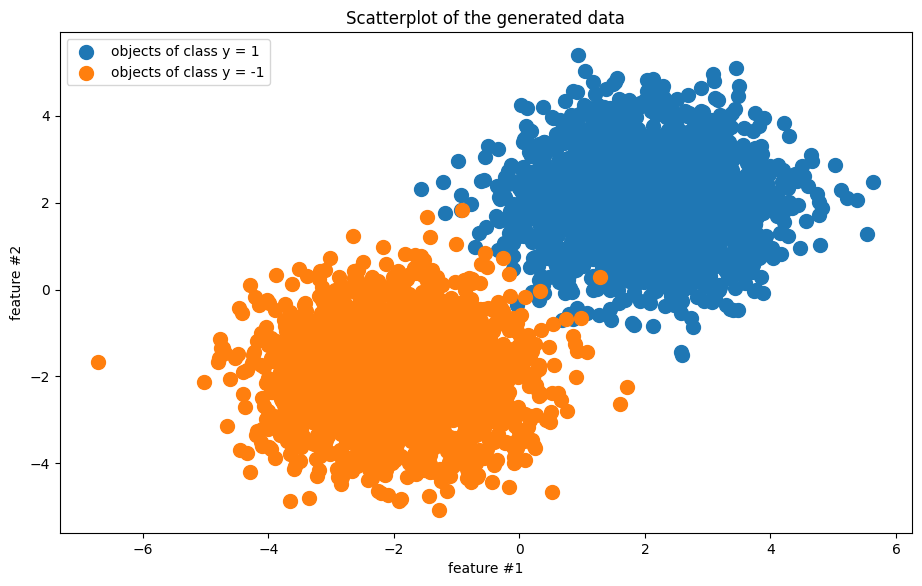

In [12]:
plt.figure(figsize=(11, 6.5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects of class y = 1')
plt.scatter(X[y == 0, 0], X[y == 0, 1], cmap='winter', s=100, label='objects of class y = -1')
plt.title('Scatterplot of the generated data')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [14]:
import sklearn

sklearn_clf = sklearn.linear_model.LogisticRegression()
sklearn_clf.fit(X_train, y_train)
sk_pred = sklearn_clf.predict(X_test)

In [15]:
def clf_test_with_sklearn(y_pred, sk_y_pred, y_true):
    metrics = np.array([accuracy(y_true, y_pred),
               precision(y_true, y_pred),
               recall(y_true, y_pred)])
    sk_metrics = np.array([accuracy(y_true, sk_y_pred),
                precision(y_true, sk_y_pred),
                recall(y_true, sk_y_pred)])
    
    print(pd.DataFrame([metrics, sk_metrics, np.abs(metrics-sk_metrics)], index=['ML_LEARN', 'SKLEARN', 'DIFF'], columns=['ACCURACY', 'PRECISION', 'RECALL']))

## Logistic regression

In [25]:
clf = LogisticRegression(verbose=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
clf_test_with_sklearn(pred, sk_pred, y_test)

Added intercept
Epoch 0. Loss: -3491.221969852322
Epoch 1. Loss: -3421.4680854572252
Epoch 2. Loss: -3353.2963465370904
Epoch 3. Loss: -3286.668693903911
Epoch 4. Loss: -3221.546306829272
Epoch 5. Loss: -3157.889869898184
Stopped on epoch 5
Added intercept
          ACCURACY  PRECISION    RECALL
ML_LEARN     0.996   0.994771  0.997379
SKLEARN      0.998   0.997382  0.998689
DIFF         0.002   0.002611  0.001311


In [17]:
pred[:100]

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [18]:
y_test[:100]

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])